In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import cluster

In [2]:
dataset = pd.read_csv('D:/Datamining/ObesityDataSet_raw_and_data_sinthetic.csv', na_values = '?')
df = dataset
df = df.replace('?', np.NaN)
df = df.dropna()

In [3]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']]: 
    df[col] = le.fit_transform(df[col])

In [4]:
from sklearn import cluster
from datetime import datetime

start = datetime.now()

hclust_fit = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward').fit(df) 

end = datetime.now()
time = end - start

print("分群時間：", time)

y = df['NObeyesdad'] 

cluster_labels = hclust_fit.labels_

分群時間： 0:00:00.223402


In [5]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(y,cluster_labels))

0.5362387494078635


In [6]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, cluster_labels, metric='euclidean'))

Silhouette Coefficient: 0.3796212465334432


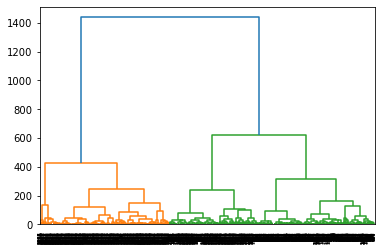

In [7]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

dendrogram = hierarchy.dendrogram(hierarchy.linkage(df, method='ward'))